# Does Geography Explain Seasonal Sunshine in U.S. Cities, or Is It Random?

In [3]:
# Import all the packages necessary 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the csv file
df = pd.read_csv('sunshine.csv')

In [5]:
# View the first few rows of the dataframe
df.head()

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [6]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      72 non-null     object 
 1   lon       72 non-null     float64
 2   lat       72 non-null     float64
 3   month     72 non-null     object 
 4   monthnum  72 non-null     int64  
 5   sunshine  72 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.5+ KB


In [7]:
# Check for Missing/Na values
na_values = df.isna().sum()
print(na_values)

city        0
lon         0
lat         0
month       0
monthnum    0
sunshine    0
dtype: int64


Line plot (month vs. sunshine), one line per city.

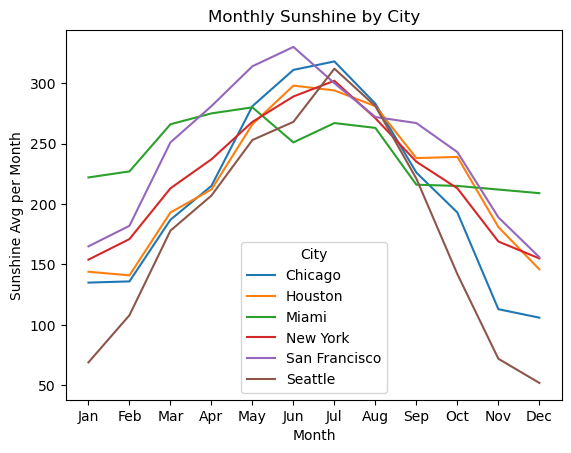

In [8]:
sns.lineplot(data=df, x='month', y='sunshine', hue='city')
plt.title('Monthly Sunshine by City')
plt.ylabel('Sunshine Avg per Month')
plt.xlabel('Month')
plt.legend(title='City')
plt.show()

From the graph, we can see that some cities, like *Seattle* and *New York*, show noticeable seasonal swings. In contrast, others, like *Miami*, remain relatively consistent throughout the year. To understand why these differences exist, we need to summarize and visualize the data further, and then explore whether there’s a meaningful relationship between geography and sunshine patterns.  

In [9]:
# Compute Annual Total Sunshine and view the results
df['annual_sunshine'] = df.groupby('city')['sunshine'].transform('sum')
print(df[['city', 'annual_sunshine']].drop_duplicates().sort_values(by='annual_sunshine', ascending=False))

             city  annual_sunshine
48  San Francisco             2950
24          Miami             2903
36       New York             2677
12        Houston             2633
0         Chicago             2504
60        Seattle             2163


We can tell from the results that top 3 'sunniest' cities are San Francisco, Miami and New york

In [10]:
# Define summer and winter months
summer_months = ['Jun', 'Jul', 'Aug']
winter_months = ['Dec', 'Jan', 'Feb']

# Summer average sunshine per city
summer_avg = df[df['month'].isin(summer_months)].groupby('city')['sunshine'].mean()

# Winter average sunshine per city
winter_avg = df[df['month'].isin(winter_months)].groupby('city')['sunshine'].mean()

# Seasonal contrast = Summer - Winter
seasonal_contrast = (summer_avg - winter_avg).sort_values(ascending=False)

print(seasonal_contrast)

city
Seattle          210.666667
Chicago          178.333333
Houston          147.333333
San Francisco    133.000000
New York         127.333333
Miami             41.000000
Name: sunshine, dtype: float64


Cities with the biggest Seasonal swings are Seattle, Chicago, and Houston

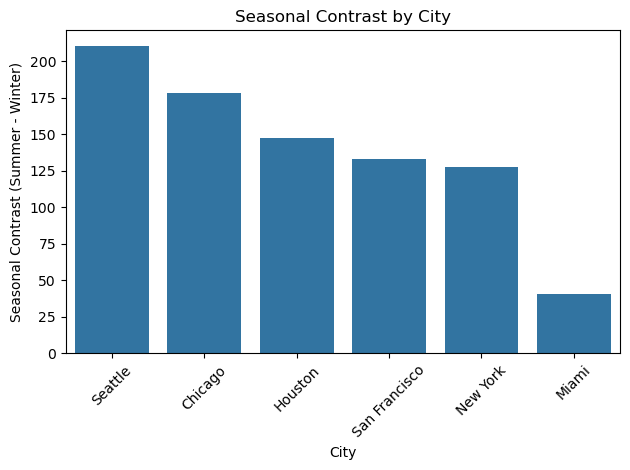

In [11]:
# Visualize Seasonal Contrast
sns.barplot(x=seasonal_contrast.index, y=seasonal_contrast.values)
plt.title('Seasonal Contrast by City')
plt.ylabel('Seasonal Contrast (Summer - Winter)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now let’s explore what might explain these patterns. We’ll focus on geography, specifically latitude and longitude because those are the ones available in the Dataset. In other words:  
- Does moving farther east or west (longitude) influence sunshine hours?  
- Does moving farther north or south (latitude) help explain seasonal differences in sunshine?  

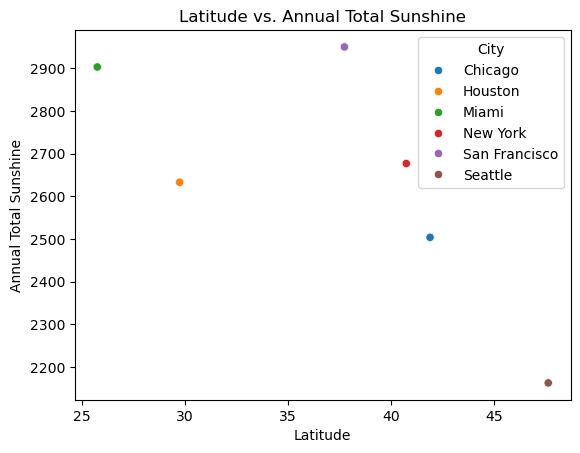

In [12]:
# Scatterplot, Latitude vs. Annual Total Sunshine
sns.scatterplot(data=df, x='lat', y='annual_sunshine', hue='city')
plt.title('Latitude vs. Annual Total Sunshine')
plt.ylabel('Annual Total Sunshine')
plt.xlabel('Latitude')
plt.legend(title='City')
plt.show()

We see a clear downward trend: northern cities (higher latitude) have fewer sunshine hours compared to southern cities.

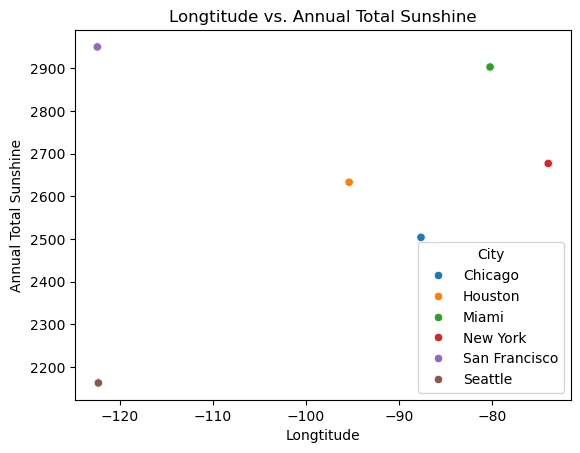

In [13]:
# Scatterplot, Longtitude vs. Annual Total Sunshine 
sns.scatterplot(data=df, x='lon', y='annual_sunshine', hue='city')
plt.title('Longtitude vs. Annual Total Sunshine')
plt.ylabel('Annual Total Sunshine')
plt.xlabel('Longtitude')
plt.legend(title='City')
plt.show()

Longitude doesn’t show a strong trend, east vs west matters less than north vs south.

We can also conclude that seasonal patterns aren't random, Lattitude plays a major role -> southern cities get more consistent sunshine, northern cities show stronger seasonal contrasts.